keras -> tensorflow.keras 로 수정

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU, UpSampling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Load Dataset

In [3]:
X_train = np.load('dataset/x_train_01.npy')
Y_train = np.load('dataset/y_train_01.npy')
X_val = np.load('dataset/x_val_01.npy')
Y_val = np.load('dataset/y_val_01.npy')

print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(240, 512, 512, 1) (240, 512, 512, 1)
(27, 512, 512, 1) (27, 512, 512, 1)


# Build Model

In [4]:
# # 빵형 코드 
# inputs = Input(shape=(256, 256, 1))

# net = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
# net = MaxPooling2D(pool_size=2, padding='same')(net)

# net = Conv2D(64, kernel_size=3, activation='relu', padding='same')(net)
# net = MaxPooling2D(pool_size=2, padding='same')(net)

# net = Conv2D(128, kernel_size=3, activation='relu', padding='same')(net)
# net = MaxPooling2D(pool_size=2, padding='same')(net)

# net = Dense(128, activation='relu')(net)

# net = UpSampling2D(size=2)(net)
# net = Conv2D(128, kernel_size=3, activation='sigmoid', padding='same')(net)

# net = UpSampling2D(size=2)(net)
# net = Conv2D(64, kernel_size=3, activation='sigmoid', padding='same')(net)

# net = UpSampling2D(size=2)(net)
# outputs = Conv2D(1, kernel_size=3, activation='sigmoid', padding='same')(net)

# model = Model(inputs=inputs, outputs=outputs)

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mse'])

# model.summary()

In [5]:
# 수정 코드 : early stopping 추가
inputs = Input(shape=X_train.shape[1:]) #(256,256,1)

net = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(64, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Conv2D(128, kernel_size=3, activation='relu', padding='same')(net)
net = MaxPooling2D(pool_size=2, padding='same')(net)

net = Dense(128, activation='relu')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(128, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
net = Conv2D(64, kernel_size=3, activation='sigmoid', padding='same')(net)

net = UpSampling2D(size=2)(net)
outputs = Conv2D(1, kernel_size=3, activation='sigmoid', padding='same')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc', 'mse'])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 128)       0     

In [6]:
# 모델 저장 폴더 만들기
# MODEL_DIR = './model/lungs_check_stop/'
# if not os.path.exists(MODEL_DIR):
#    os.mkdir(MODEL_DIR)

# modelpath="./model/lungs_check_stop/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
# checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [7]:
# learning rate 조절로 모델 개선 유도
# - monitor : 기준이 되는 값. val_loss 가 더이상 감소되지 않을 경우 적용
# - factor : new learning rate = learning rate * factor
# - patience : 더이상 monitor값의 개선이 없을 경우, 몇 번의 epoch을 진행하고, learning rate를 조절할지
# - verbose : 1 : EarlyStopping 적용. 화면에 표시
# - mode : 모니터 값이 최소가 되어야 하는가, 최대가 되어야 하는가. auto = 모델이 알아서
# - min_lr : learning rate 하한선
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1, mode='auto', min_lr=1e-05)

# Train

In [8]:
%%time
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32, callbacks=[reduce_lr_callback])

Epoch 1/100
8/8 [==============================] - 210s 26s/step - loss: 0.5806 - acc: 0.7196 - mse: 0.1935 - val_loss: 0.4981 - val_acc: 0.7712 - val_mse: 0.1617
Epoch 2/100
8/8 [==============================] - 210s 26s/step - loss: 0.4887 - acc: 0.7608 - mse: 0.1619 - val_loss: 0.4582 - val_acc: 0.7712 - val_mse: 0.1525
Epoch 3/100
8/8 [==============================] - 210s 26s/step - loss: 0.4539 - acc: 0.7608 - mse: 0.1533 - val_loss: 0.4349 - val_acc: 0.7712 - val_mse: 0.1476
Epoch 4/100
8/8 [==============================] - 210s 26s/step - loss: 0.4354 - acc: 0.7608 - mse: 0.1491 - val_loss: 0.4293 - val_acc: 0.7712 - val_mse: 0.1469
Epoch 5/100
8/8 [==============================] - 210s 26s/step - loss: 0.4270 - acc: 0.7608 - mse: 0.1467 - val_loss: 0.4146 - val_acc: 0.7712 - val_mse: 0.1421
Epoch 6/100
8/8 [==============================] - 211s 26s/step - loss: 0.4183 - acc: 0.7608 - mse: 0.1443 - val_loss: 0.4122 - val_acc: 0.7712 - val_mse: 0.1418
Epoch 7/100
8/8 [=====

# Evaluation

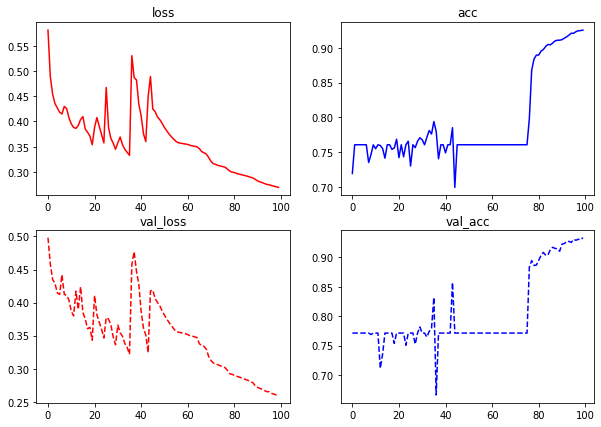

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history.history['loss'], 'r')
ax[0, 1].set_title('acc')
ax[0, 1].plot(history.history['acc'], 'b')

ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history.history['val_loss'], 'r--')
ax[1, 1].set_title('val_acc')
ax[1, 1].plot(history.history['val_acc'], 'b--')

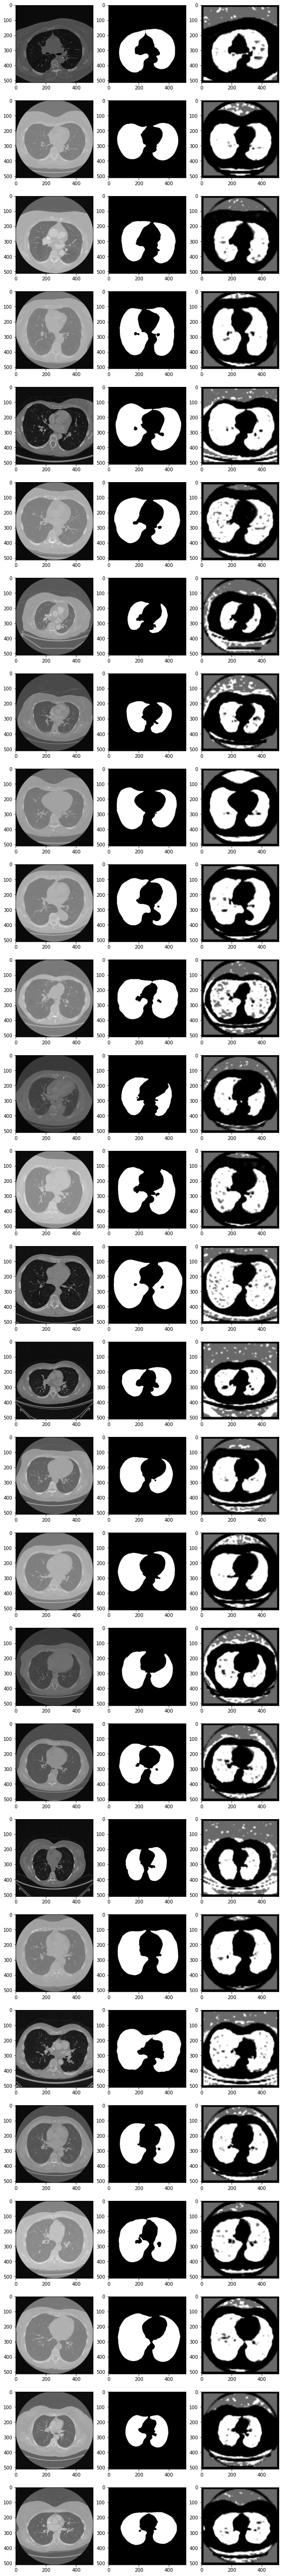

In [10]:
preds = model.predict(X_val)

fig, ax = plt.subplots(len(X_val), 3, figsize=(10, 100))

for i, pred in enumerate(preds):
    ax[i, 0].imshow(X_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(Y_val[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')